In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
TEST_SET_YEARS = [1983, 1984, 1993, 1994, 2003, 2004, 2013, 2014]

In [2]:
algo_results_src = '/Users/davide/Developer/ml-tropical-cyclones-detection/data/inference/trackers_comparison/algorithms_comparison.csv'

selected_model = '10_swin_lnc3_msl_vo_850'
algo_results = pd.read_csv(algo_results_src, index_col=0)
algo_results = algo_results[algo_results['model']==selected_model]

In [3]:
test_algo_results = algo_results[algo_results['years']=='test']
all_algo_results = algo_results[algo_results['years']=='all']

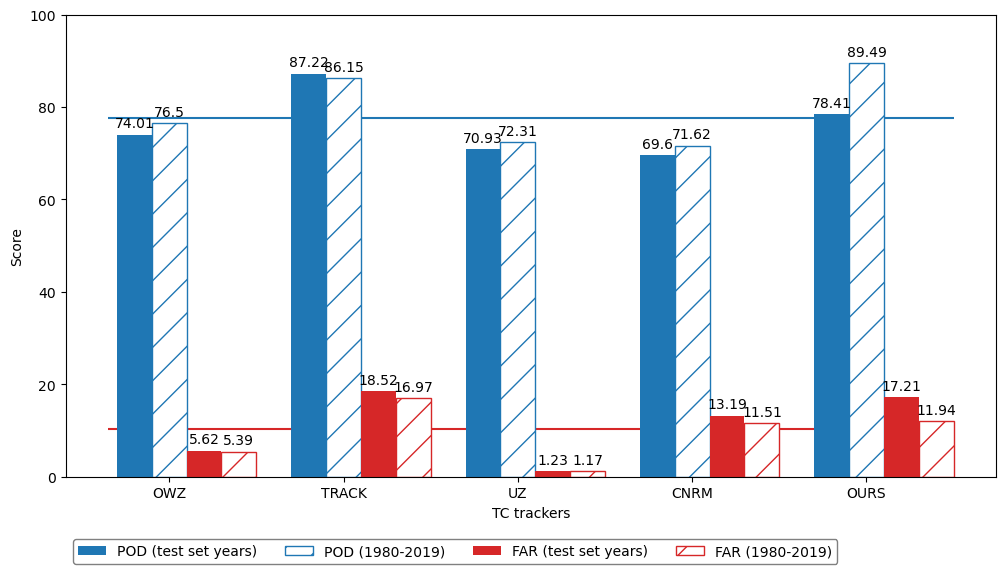

In [4]:
x = np.arange(len(test_algo_results))  # the label locations
width = 0.2  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

# add horizontal mean
ax.hlines(y=algo_results['pod'].mean(), xmin=-0.15, xmax=4.7, zorder=0, color='tab:blue')
ax.hlines(y=algo_results['far'].mean(), xmin=-0.15, xmax=4.7, zorder=0, color='tab:red')

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['pod'],2), width, label='POD (test set years)', color='tab:blue')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(all_algo_results['pod'],2), width, hatch = "/", label='POD (1980-2019)', color = "white", edgecolor='tab:blue')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['far'],2), width, label='FAR (test set years)', color='tab:red')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(all_algo_results['far'],2), width, hatch = "/", label='FAR (1980-2019)', color = "white", edgecolor='tab:red')
ax.bar_label(rects, padding=3)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xlabel('TC trackers')
ax.set_xticks(x + width, test_algo_results['algo'])
ax.set_ylim(0, 100)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc='upper left', markerscale=8, edgecolor='gray', framealpha=1, ncol=4, bbox_to_anchor=(0.0 ,-0.12))

plt.show()

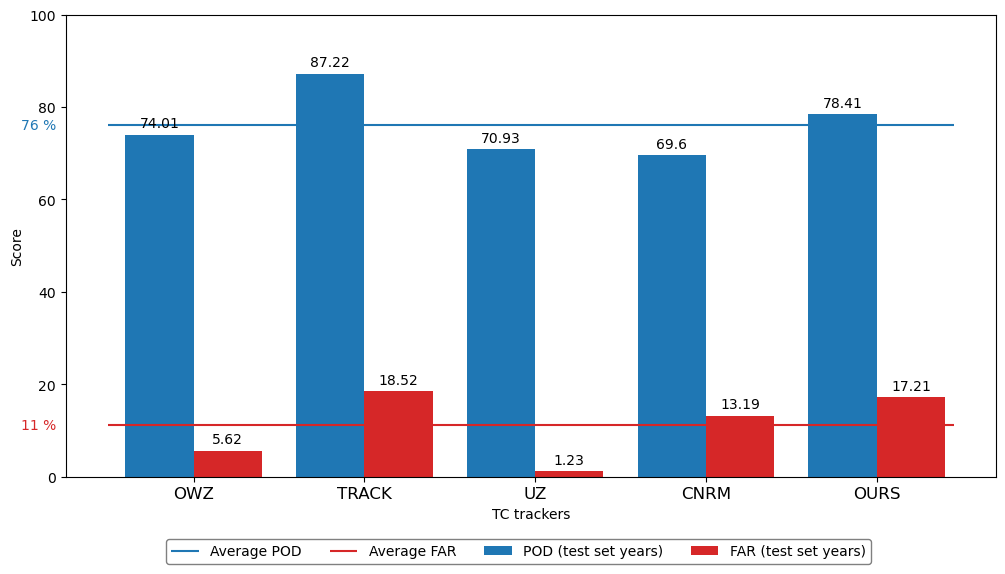

In [5]:
import matplotlib.transforms as transforms

x = np.arange(len(test_algo_results))  # the label locations
width = 0.4  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(layout='constrained', figsize=(12,6))

# add horizontal mean
ax.hlines(y=test_algo_results['pod'].mean(), xmin=-0.3, xmax=4.65, zorder=0, color='tab:blue', label='Average POD')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, test_algo_results['pod'].mean(), "{:.0f} %".format(test_algo_results['pod'].mean()), color="tab:blue", transform=trans, ha="right", va="center")

ax.hlines(y=test_algo_results['far'].mean(), xmin=-0.3, xmax=4.65, zorder=999, color='tab:red', label='Average FAR')
trans = transforms.blended_transform_factory(ax.get_yticklabels()[0].get_transform(), ax.transData)
ax.text(0, test_algo_results['far'].mean(), "{:.0f} %".format(test_algo_results['far'].mean()), color="tab:red", transform=trans, ha="right", va="center")

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['pod'],2), width, label='POD (test set years)', color='tab:blue')
ax.bar_label(rects, padding=3)
multiplier += 1

offset = width * multiplier
rects = ax.bar(x + offset, np.round(test_algo_results['far'],2), width, label='FAR (test set years)', color='tab:red')
ax.bar_label(rects, padding=3)
multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Score')
ax.set_xlabel('TC trackers')
ax.set_xticks(x + width/2, test_algo_results['algo'], fontsize=12)
ax.set_ylim(0, 100)

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width, box.height])
ax.legend(loc='upper left', markerscale=8, edgecolor='gray', framealpha=1, ncol=4, bbox_to_anchor=(0.1 ,-0.12))

plt.show()

In [8]:
algo_results = pd.read_csv(algo_results_src, index_col=0)
algo_results = algo_results[(algo_results['algo']=='OURS')].sort_values(by='years').sort_values(by='model')
algo_results

,algo,hits,misses,false alarms,pod,far,years,model
94,OURS,1042,124,155,89.365352,12.949039,all,02_swin_msl_vo_850
89,OURS,178,52,49,77.391304,21.585903,test,02_swin_msl_vo_850
79,OURS,1004,131,156,88.458150,13.448276,all,03_vgg_v3_relu_ks3_msl_vo_850
84,OURS,177,40,40,81.566820,18.433180,test,03_vgg_v3_relu_ks3_msl_vo_850
74,OURS,998,143,164,87.467134,14.113597,all,04_vgg_v3_relu_ks5_msl_vo_850
69,OURS,170,52,44,76.576577,20.560748,test,04_vgg_v3_relu_ks5_msl_vo_850
99,OURS,1017,161,609,86.332767,37.453875,all,05_vgg_v3_linear_ks3_msl_vo_850
64,OURS,208,37,138,84.897959,39.884393,test,05_vgg_v3_linear_ks3_msl_vo_850
54,OURS,1019,139,159,87.996546,13.497453,all,06_swin_msl_vo_850
59,OURS,183,42,42,81.333333,18.666667,test,06_swin_msl_vo_850


/var/folders/np/mdnv6_7j1gs11_gvk6l42b5r0000gn/T/ipykernel_8869/820833190.py:22: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['model ' + str(model[:2]) for model in algo_results.model.unique()], rotation=45)


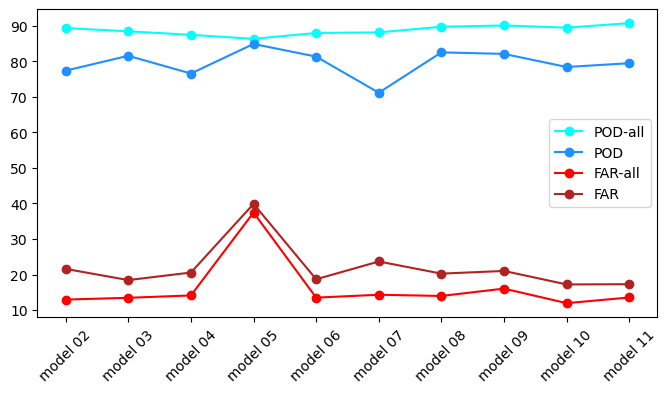

In [46]:
fig, ax = plt.subplots(1,1,figsize=(8,4))


y = algo_results[algo_results['years']=='all']['pod']
x = np.arange(len(y))
plt.plot(x, y, marker='o', label='POD-all', color='cyan')

y = algo_results[algo_results['years']=='test']['pod']
x = np.arange(len(y))
plt.plot(x, y, marker='o', label='POD', color='dodgerblue')


y = algo_results[algo_results['years']=='all']['far']
x = np.arange(len(y))
plt.plot(x, y, marker='o', label='FAR-all', color='red')

y = algo_results[algo_results['years']=='test']['far']
x = np.arange(len(y))
plt.plot(x, y, marker='o', label='FAR', color='firebrick')


ax.set_xticklabels(['model ' + str(model[:2]) for model in algo_results.model.unique()], rotation=45)
ax.set_xticks(np.arange(len(algo_results.model.unique())))
plt.legend()
plt.show()

/var/folders/np/mdnv6_7j1gs11_gvk6l42b5r0000gn/T/ipykernel_8869/1699445801.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['model ' + str(model[:2]) for model in algo_results.model.unique()], rotation=45)


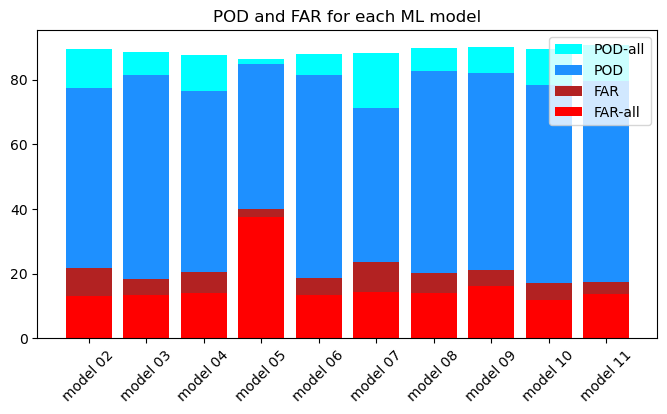

In [49]:
fig, ax = plt.subplots(1,1,figsize=(8,4))

plt.title('POD and FAR for each ML model')

y = algo_results[algo_results['years']=='all']['pod']
x = np.arange(len(y))
plt.bar(x, y, label='POD-all', color='cyan')

y = algo_results[algo_results['years']=='test']['pod']
x = np.arange(len(y))
plt.bar(x, y, label='POD', color='dodgerblue')

y = algo_results[algo_results['years']=='test']['far']
x = np.arange(len(y))
plt.bar(x, y, label='FAR', color='firebrick')

y = algo_results[algo_results['years']=='all']['far']
x = np.arange(len(y))
plt.bar(x, y, label='FAR-all', color='red')

ax.set_xticklabels(['model ' + str(model[:2]) for model in algo_results.model.unique()], rotation=45)
ax.set_xticks(np.arange(len(algo_results.model.unique())))
plt.legend()
plt.show()